In [1]:
import pandas as pd
import numpy as np

import time

from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the dataset
file_path = 'data_modified.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(tabulate(data.head(), headers='keys', tablefmt='rounded_grid', showindex="always"))

╭────┬───────┬───────────────────┬──────────────┬────────────────────────┬────────────┬───────────────────┬──────────────────┬─────────────────────┬──────────────────┬────────────────────────┬────────────────────┬──────────┬──────────────────────────────────┬──────────┬─────────────┬────────────────────┬───────────╮
│    │   Age │ Education_Level   │ Occupation   │   Number_of_Dependents │ Location   │   Work_Experience │ Marital_Status   │ Employment_Status   │   Household_Size │ Homeownership_Status   │ Type_of_Housing    │ Gender   │ Primary_Mode_of_Transportation   │   Income │ Age_Group   │ Living_Standards   │   Cluster │
├────┼───────┼───────────────────┼──────────────┼────────────────────────┼────────────┼───────────────────┼──────────────────┼─────────────────────┼──────────────────┼────────────────────────┼────────────────────┼──────────┼──────────────────────────────────┼──────────┼─────────────┼────────────────────┼───────────┤
│  0 │    56 │ Master's          │ Technology 

In [3]:
# data.drop(columns=['Age_Group', 'Education_Level', 'Marital_Status', 'Gender', 'Occupation', 'Primary_Mode_of_Transportation'], inplace=True)

In [4]:
data.dtypes

Age                                int64
Education_Level                   object
Occupation                        object
Number_of_Dependents               int64
Location                          object
Work_Experience                    int64
Marital_Status                    object
Employment_Status                 object
Household_Size                     int64
Homeownership_Status              object
Type_of_Housing                   object
Gender                            object
Primary_Mode_of_Transportation    object
Income                             int64
Age_Group                         object
Living_Standards                  object
Cluster                            int64
dtype: object

In [5]:
data.select_dtypes(include=['object']).dtypes

Education_Level                   object
Occupation                        object
Location                          object
Marital_Status                    object
Employment_Status                 object
Homeownership_Status              object
Type_of_Housing                   object
Gender                            object
Primary_Mode_of_Transportation    object
Age_Group                         object
Living_Standards                  object
dtype: object

In [6]:
data.select_dtypes(include=['number']).dtypes

Age                     int64
Number_of_Dependents    int64
Work_Experience         int64
Household_Size          int64
Income                  int64
Cluster                 int64
dtype: object

In [7]:
# Define features and target
X = data.drop('Income', axis=1)
y = data['Income']

In [8]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [9]:
# Create preprocessing pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [10]:
# Fit and transform the entire dataset
X_processed = preprocessor.fit_transform(X)

In [11]:
# Split the data after preprocessing
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
# Display shapes of the datasets
data_shapes = [
    ["Dataset", "Shape"],
    ["X_train", X_train.shape],
    ["y_train", y_train.shape],
    ["X_val", X_val.shape],
    ["y_val", y_val.shape],
    ["X_test", X_test.shape],
    ["y_test", y_test.shape]
]

In [13]:
# Print the table
print(tabulate(data_shapes, headers="firstrow", tablefmt="grid"))

+-----------+------------+
| Dataset   | Shape      |
+===========+============+
| X_train   | (7000, 41) |
+-----------+------------+
| y_train   | (7000,)    |
+-----------+------------+
| X_val     | (1500, 41) |
+-----------+------------+
| y_val     | (1500,)    |
+-----------+------------+
| X_test    | (1500, 41) |
+-----------+------------+
| y_test    | (1500,)    |
+-----------+------------+


In [14]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=6112024),
    'Gradient Boosting': GradientBoostingRegressor(random_state=6112024),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(random_state=6112024),
    'MLP Regressor': MLPRegressor(random_state=6112024),
    'Decision Tree': DecisionTreeRegressor(random_state=6112024),
    'AdaBoost': AdaBoostRegressor(random_state=6112024),
    'Bagging': BaggingRegressor(random_state=6112024),
    'Kernel Ridge': KernelRidge(),
    'Gaussian Process': GaussianProcessRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=6112024)
}

In [15]:
models

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'Random Forest': RandomForestRegressor(random_state=6112024),
 'Gradient Boosting': GradientBoostingRegressor(random_state=6112024),
 'Support Vector Regressor': SVR(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              

In [16]:
param_grids = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
    'MLP Regressor': {'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)], 'activation': ['relu', 'tanh'], 'learning_rate': ['constant', 'adaptive']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'Bagging': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.75, 1.0], 'max_features': [0.5, 0.75, 1.0]},
    'Kernel Ridge': {'alpha': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.01, 0.1, 1.0, None]},
    'Gaussian Process': {'alpha': [1e-10, 1e-2, 1.0], 'n_restarts_optimizer': [0, 1, 2]},
    'KNeighbors': {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'Hist Gradient Boosting': {'learning_rate': [0.01, 0.1, 0.2], 'max_iter': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_leaf': [20, 50, 100]}
}

In [17]:
param_grids

{'Random Forest': {'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'Gradient Boosting': {'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 4, 5]},
 'XGBoost': {'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 4, 5]},
 'MLP Regressor': {'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
  'activation': ['relu', 'tanh'],
  'learning_rate': ['constant', 'adaptive']},
 'Decision Tree': {'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'AdaBoost': {'n_estimators': [50, 100, 200],
  'learning_rate': [0.01, 0.1, 1.0]},
 'Bagging': {'n_estimators': [10, 50, 100],
  'max_samples': [0.5, 0.75, 1.0],
  'max_features': [0.5, 0.75, 1.0]},
 'Kernel Ridge': {'alpha': [0.1, 1.0, 10.0],
  'kernel': ['linear', 'rbf', 'poly'],
  'gamma': [0.01, 0.1, 1.0, None]},
 'Gaussian Process': 

In [18]:
# Train models and evaluate on the validation set
metrics = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_val_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2,
        'Time': end_time - start_time
    }
    
    print(f'{name} RMSE: {rmse}, MAE: {mae}, R^2: {r2}, Time: {end_time - start_time} seconds')


Linear Regression RMSE: 970123.2941480164, MAE: 686471.9546666667, R^2: 0.711736692851792, Time: 0.05151176452636719 seconds
Ridge RMSE: 970320.3591600853, MAE: 685008.4869043705, R^2: 0.711619568807618, Time: 0.0040013790130615234 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+14, tolerance: 2.300e+12
  model = cd_fast.enet_coordinate_descent(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\skl

Lasso RMSE: 970291.2132698864, MAE: 685065.0396082385, R^2: 0.7116368929378807, Time: 0.20249557495117188 seconds
ElasticNet RMSE: 1233274.9778420827, MAE: 743741.1407952401, R^2: 0.5341400889013664, Time: 0.004996061325073242 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest RMSE: 708258.370886568, MAE: 308199.7254733334, R^2: 0.8463548231917641, Time: 3.4545228481292725 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting RMSE: 700092.5645973744, MAE: 315414.1410693607, R^2: 0.8498772782365638, Time: 0.7420783042907715 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Support Vector Regressor RMSE: 1953741.5047044978, MAE: 749782.74028475, R^2: -0.16914857459710486, Time: 1.4379620552062988 seconds
XGBoost RMSE: 770150.8665572164, MAE: 349245.4521054891, R^2: 0.8183283805847168, Time: 0.10999941825866699 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To ca

MLP Regressor RMSE: 1954051.5900827448, MAE: 753920.5597191963, R^2: -0.1695197236429722, Time: 7.512524843215942 seconds
Decision Tree RMSE: 1006204.5153752044, MAE: 421719.822, R^2: 0.689895532388192, Time: 0.05210399627685547 seconds
AdaBoost RMSE: 705162.062705926, MAE: 327028.40470853104, R^2: 0.8476952745065444, Time: 0.14996671676635742 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Bagging RMSE: 752681.9098988195, MAE: 326324.695, R^2: 0.8264764373264284, Time: 0.35616087913513184 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Kernel Ridge RMSE: 970321.6712434844, MAE: 685005.7133939465, R^2: 0.7116187889014177, Time: 1.9986257553100586 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gaussian Process RMSE: 1489215.4385736936, MAE: 570747.479346157, R^2: 0.32071729234664326, Time: 4.278496742248535 seconds
KNeighbors RMSE: 888240.4780761542, MAE: 391805.2125333333, R^2: 0.7583445353944114, Time: 0.0 seconds
Hist Gradient Boosting RMSE: 721653.9709129329, MAE: 318578.78389592253, R^2: 0.8404879448099385, Time: 0.27100229263305664 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# Prepare data for tabulation
metrics_table = [["Model", "RMSE", "MAE", "R^2", "Time (seconds)"]]
for model_name, metric_values in metrics.items():
    metrics_table.append([
        model_name, 
        f"{metric_values['RMSE']:.3f}", 
        f"{metric_values['MAE']:.3f}", 
        f"{metric_values['R^2']:.3f}", 
        f"{metric_values['Time']:.4f}"
    ])

In [20]:
# Print the table
print(tabulate(metrics_table, headers="firstrow", tablefmt="grid"))

+--------------------------+------------------+--------+--------+------------------+
| Model                    |             RMSE |    MAE |    R^2 |   Time (seconds) |
+==========================+==================+========+========+==================+
| Linear Regression        | 970123           | 686472 |  0.712 |           0.0515 |
+--------------------------+------------------+--------+--------+------------------+
| Ridge                    | 970320           | 685008 |  0.712 |           0.004  |
+--------------------------+------------------+--------+--------+------------------+
| Lasso                    | 970291           | 685065 |  0.712 |           0.2025 |
+--------------------------+------------------+--------+--------+------------------+
| ElasticNet               |      1.23327e+06 | 743741 |  0.534 |           0.005  |
+--------------------------+------------------+--------+--------+------------------+
| Random Forest            | 708258           | 308200 |  0.846 |

In [21]:
# Convert metrics dictionary to DataFrame for easier processing
metrics_df = pd.DataFrame(metrics).T

# Normalize the metrics using min-max scaling
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(metrics_df[['RMSE', 'MAE', 'R^2']])
normalized_df = pd.DataFrame(normalized_metrics, columns=['RMSE', 'MAE', 'R^2'], index=metrics_df.index)

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute the weighted score for each model
normalized_df['Score'] = (
    weights['RMSE'] * (1 - normalized_df['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - normalized_df['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * normalized_df['R^2']  # Higher R^2 is better
)

In [22]:
# Find the best model based on the highest score
best_model_name = normalized_df['Score'].idxmax()
best_model_metrics = metrics[best_model_name]
best_model_instance = models[best_model_name]

# Print the best model metrics
best_model_table = [
    ["Metric", "Value"],
    ["Best Model", best_model_name],
    ["RMSE", f"{best_model_metrics['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics['R^2']:.3f}"],
    ["Time (seconds)", f"{best_model_metrics['Time']:.4f}"]
]
print("\nBest Model Metrics:")
print(tabulate(best_model_table, headers="firstrow", tablefmt="grid"))


Best Model Metrics:
+----------------+---------------+
| Metric         | Value         |
+================+===============+
| Best Model     | Random Forest |
+----------------+---------------+
| RMSE           | 708258.371    |
+----------------+---------------+
| MAE            | 308199.725    |
+----------------+---------------+
| R^2            | 0.846         |
+----------------+---------------+
| Time (seconds) | 3.4545        |
+----------------+---------------+


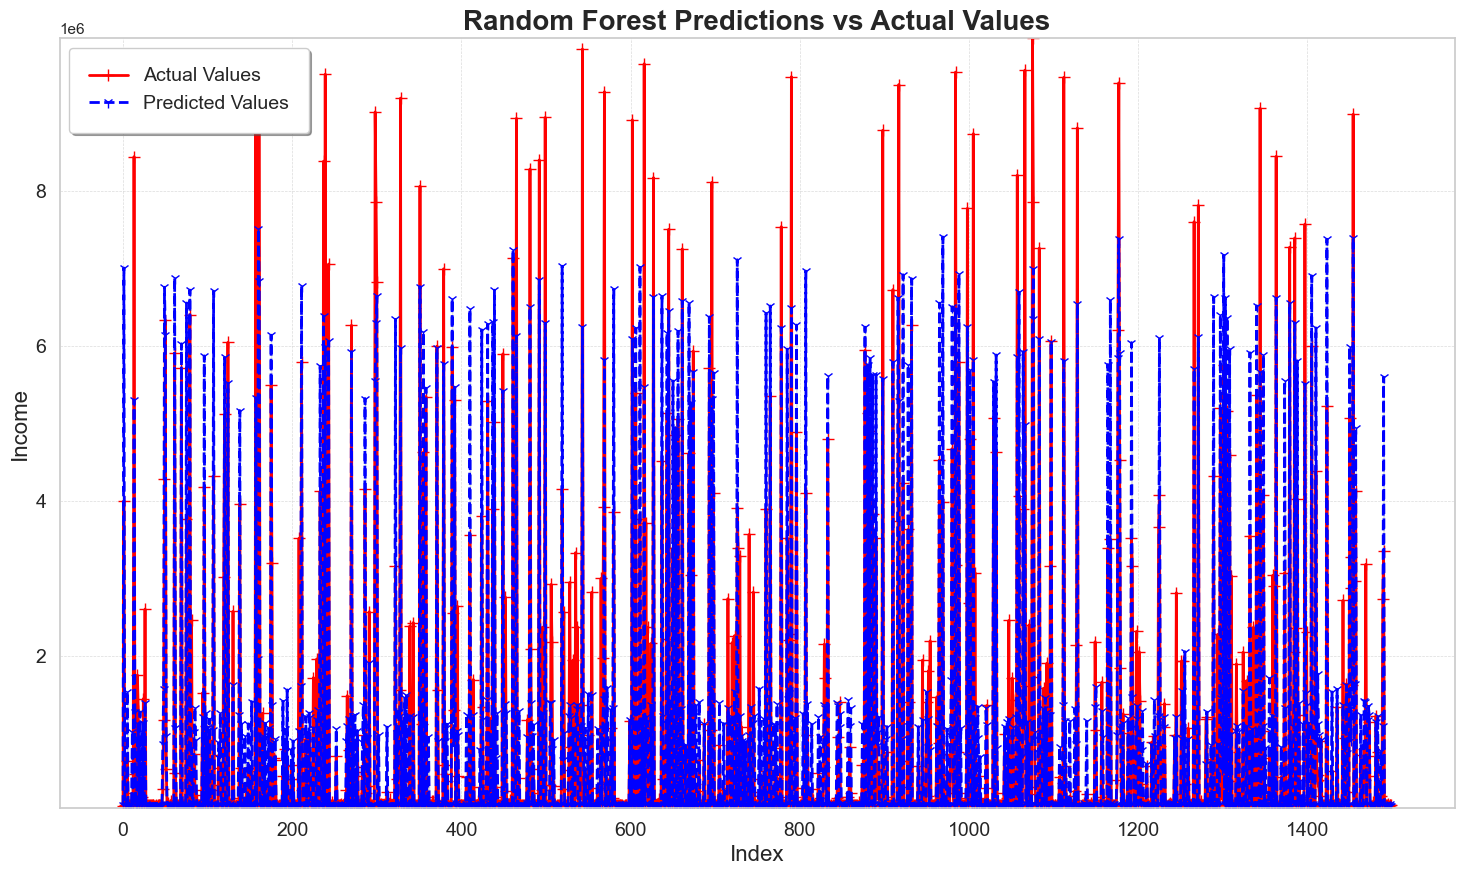

In [23]:
# Predict using the best model
y_test_pred = best_model_instance.predict(X_test)

# Set the theme using seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Improved plot for the predictions vs actual values for the best model
plt.figure(figsize=(18, 10))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', color='red', linestyle='-', marker='+', markersize=8, linewidth=2)

# Plot predicted values
plt.plot(y_test_pred, label='Predicted Values', color='blue', linestyle='--', marker='1', markersize=8, linewidth=2)

# Fill between for better visualization of the prediction range
plt.fill_between(range(len(y_test)), y_test, y_test_pred, color='gray', alpha=0.2)

# Set the y-axis limits based on the min and max of y_test and y_test_pred
y_min = min(min(y_test), min(y_test_pred))
y_max = max(max(y_test), max(y_test_pred))
plt.ylim(y_min - 1, y_max + 1)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title(f'{best_model_name} Predictions vs Actual Values', fontsize=20, fontweight='bold')
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, fancybox=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [24]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_model, best_params, best_score

In [25]:
# Perform Grid Search CV for selected models
metrics_param = {}
best_models = {}

for model_name in param_grids.keys():
    print(f"\nTuning {model_name}...")
    model = models[model_name]
    param_grid = param_grids[model_name]
    start_time = time.time()
    best_model, best_params, best_score = perform_grid_search(model, param_grid, X_train, y_train)
    end_time = time.time()
    best_models[model_name] = best_model
    y_val_pred = best_model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    metrics_param[f'{model_name} (Tuned)'] = {'RMSE': rmse, 'MAE': mae, 'R^2': r2, 'Time': end_time - start_time}
    print(f'Best parameters: {best_params}')
    print(f'Best score: {best_score}')
    print(f'{model_name} (Tuned) RMSE: {rmse}, MAE: {mae}, R^2: {r2}, Time: {end_time - start_time} seconds')



Tuning Random Forest...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.84348730353956
Random Forest (Tuned) RMSE: 701509.6713750015, MAE: 305062.38336480473, R^2: 0.8492689151480048, Time: 198.5403711795807 seconds

Tuning Gradient Boosting...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.8473981503558466
Gradient Boosting (Tuned) RMSE: 704238.5265709322, MAE: 324559.7193395392, R^2: 0.848093953947551, Time: 31.128334283828735 seconds

Tuning XGBoost...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.8473824620246887
XGBoost (Tuned) RMSE: 703905.7487095922, MAE: 324732.20990625, R^2: 0.8482375144958496, Time: 3.8866405487060547 seconds

Tuning MLP Regressor...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant'}
Best score: 0.7405735243255401
MLP Regressor (Tuned) RMSE: 829588.5559871161, MAE: 410469.11854616896, R^2: 0.7892046608314178, Time: 61.22577691078186 seconds

Tuning Decision Tree...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.7831435544242897
Decision Tree (Tuned) RMSE: 834836.4989047546, MAE: 352123.2124174831, R^2: 0.7865292600690912, Time: 0.9769637584686279 seconds

Tuning AdaBoost...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.8516143688994738
AdaBoost (Tuned) RMSE: 701643.1479528357, MAE: 307195.6285337446, R^2: 0.8492115503411242, Time: 5.086706638336182 seconds

Tuning Bagging...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score: 0.8428227171775726
Bagging (Tuned) RMSE: 706751.8394829087, MAE: 309447.04416, R^2: 0.8470077631721904, Time: 21.757660388946533 seconds

Tuning Kernel Ridge...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'alpha': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Best score: 0.8408486133164649
Kernel Ridge (Tuned) RMSE: 714128.0917941994, MAE: 371950.2325660625, R^2: 0.8437975886526208, Time: 103.25309705734253 seconds

Tuning Gaussian Process...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'alpha': 1e-10, 'n_restarts_optimizer': 0}
Best score: 0.2924490744007816
Gaussian Process (Tuned) RMSE: 1489215.4385736936, MAE: 570747.479346157, R^2: 0.32071729234664326, Time: 69.34896755218506 seconds

Tuning KNeighbors...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}
Best score: 0.775868642443324
KNeighbors (Tuned) RMSE: 859988.1485667569, MAE: 394240.1461380303, R^2: 0.7734727608954239, Time: 3.7699408531188965 seconds

Tuning Hist Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'max_iter': 300, 'min_samples_leaf': 100}
Best score: 0.8471090586064356
Hist Gradient Boosting (Tuned) RMSE: 705269.7688610259, MAE: 324964.78807180864, R^2: 0.8476487450347079, Time: 33.47004222869873 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
# Prepare data for tabulation
metrics_table_param = [["Model", "RMSE", "MAE", "R^2", "Time (seconds)"]]
for model_name, metric_values in metrics_param.items():
    metrics_table_param.append([
        model_name, 
        f"{metric_values['RMSE']:.2f}", 
        f"{metric_values['MAE']:.2f}", 
        f"{metric_values['R^2']:.6f}", 
        f"{metric_values['Time']:.6f}"
    ])

In [27]:
# Print the table
print(tabulate(metrics_table_param, headers="firstrow", tablefmt="grid"))

+--------------------------------+------------------+--------+----------+------------------+
| Model                          |             RMSE |    MAE |      R^2 |   Time (seconds) |
+================================+==================+========+==========+==================+
| Random Forest (Tuned)          | 701510           | 305062 | 0.849269 |       198.54     |
+--------------------------------+------------------+--------+----------+------------------+
| Gradient Boosting (Tuned)      | 704239           | 324560 | 0.848094 |        31.1283   |
+--------------------------------+------------------+--------+----------+------------------+
| XGBoost (Tuned)                | 703906           | 324732 | 0.848238 |         3.88664  |
+--------------------------------+------------------+--------+----------+------------------+
| MLP Regressor (Tuned)          | 829589           | 410469 | 0.789205 |        61.2258   |
+--------------------------------+------------------+--------+--------

In [28]:
# Normalize the metrics for models with hyperparameter tuning
metrics_df_param = pd.DataFrame(metrics_param).T

# Normalize the metrics using MinMax scaling
scaler = MinMaxScaler()
metrics_df_param[['RMSE', 'MAE', 'R^2']] = scaler.fit_transform(metrics_df_param[['RMSE', 'MAE', 'R^2']])

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute a weighted score for each model
metrics_df_param['Score'] = (
    weights['RMSE'] * (1 - metrics_df_param['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - metrics_df_param['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * metrics_df_param['R^2']  # Higher R^2 is better
)

In [29]:
# Find the best model based on the highest score
best_model_name_param = metrics_df_param['Score'].idxmax()
best_model_metrics_param = metrics_param[best_model_name_param]
best_model_instance_param = best_models[best_model_name_param.split(" (Tuned)")[0]]  # Remove the "(Tuned)" part to get the model name

# Print the best model metrics
best_model_table_param = [
    ["Metric", "Value"],
    ["Best Model", best_model_name_param],
    ["RMSE", f"{best_model_metrics_param['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics_param['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics_param['R^2']:.6f}"],
    ["Time (seconds)", f"{best_model_metrics_param['Time']:.6f}"]
]
print("\nBest Model Metrics:")
print(tabulate(best_model_table_param, headers="firstrow", tablefmt="grid"))


Best Model Metrics:
+----------------+-----------------------+
| Metric         | Value                 |
+================+=======================+
| Best Model     | Random Forest (Tuned) |
+----------------+-----------------------+
| RMSE           | 701509.671            |
+----------------+-----------------------+
| MAE            | 305062.383            |
+----------------+-----------------------+
| R^2            | 0.849269              |
+----------------+-----------------------+
| Time (seconds) | 198.540371            |
+----------------+-----------------------+


In [30]:
# Evaluate the best model on the test set
y_test_pred_param = best_model_instance_param.predict(X_test)
rmse_test_param = mean_squared_error(y_test, y_test_pred_param, squared=False)
mae_test_param = mean_absolute_error(y_test, y_test_pred_param)
r2_test_param = r2_score(y_test, y_test_pred_param)

# Print the test set metrics
test_metrics_table_param = [
    ["Metric", "Value"],
    ["Best Model", best_model_name_param],
    ["RMSE", f"{rmse_test_param:.3f}"],
    ["MAE", f"{mae_test_param:.3f}"],
    ["R^2", f"{r2_test_param:.6f}"]
]
print("\nTest Set Metrics:")
print(tabulate(test_metrics_table_param, headers="firstrow", tablefmt="grid"))


Test Set Metrics:
+------------+-----------------------+
| Metric     | Value                 |
+============+=======================+
| Best Model | Random Forest (Tuned) |
+------------+-----------------------+
| RMSE       | 771805.677            |
+------------+-----------------------+
| MAE        | 348718.067            |
+------------+-----------------------+
| R^2        | 0.830252              |
+------------+-----------------------+


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


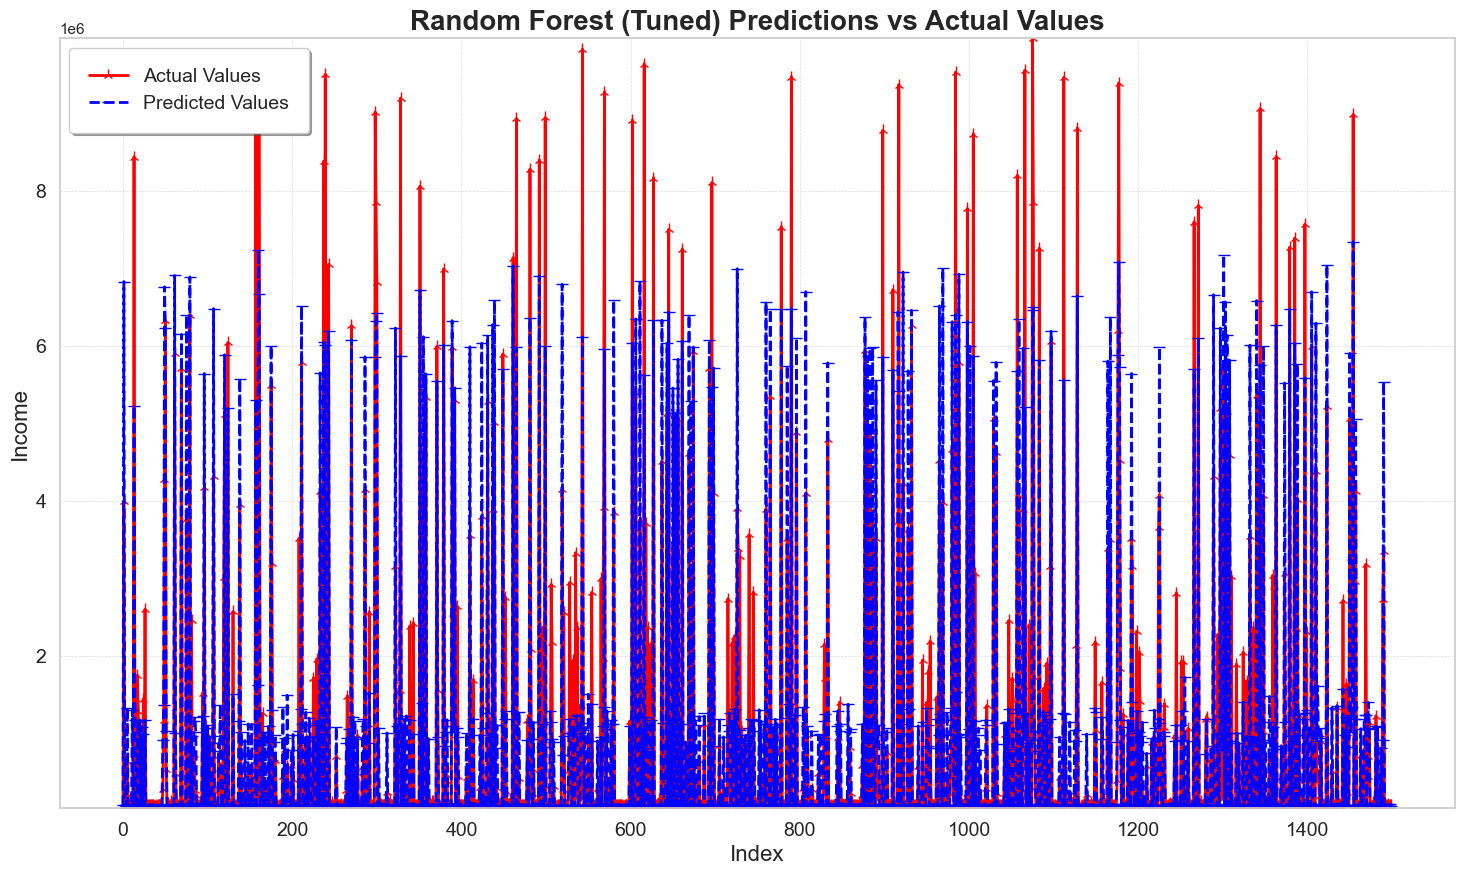

In [31]:
# Set the theme using seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Improved plot for the predictions vs actual values for the best model after hyperparameter tuning
plt.figure(figsize=(18, 10))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', color='red', linestyle='-', marker='2', markersize=8, linewidth=2)

# Plot predicted values
plt.plot(y_test_pred_param, label='Predicted Values', color='blue', linestyle='--', marker='_', markersize=8, linewidth=2)

# Fill between for better visualization of the prediction range
plt.fill_between(range(len(y_test)), y_test, y_test_pred_param, color='gray', alpha=0.2)

# Set the y-axis limits based on the min and max of y_test and y_test_pred_param
y_min = min(min(y_test), min(y_test_pred_param))
y_max = max(max(y_test), max(y_test_pred_param))
plt.ylim(y_min - 1, y_max + 1)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title(f'{best_model_name_param} Predictions vs Actual Values', fontsize=20, fontweight='bold')
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, fancybox=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [32]:
# Deep Learning Model
def build_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [33]:
# Build and train the Deep Learning Model
input_dim = X_train.shape[1]
dl_model = build_dl_model(input_dim)
start_time = time.time()
dl_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=2)
end_time = time.time()

d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 - 1s - 5ms/step - loss: 3936728907776.0000 - val_loss: 3929970311168.0000
Epoch 2/100
219/219 - 0s - 1ms/step - loss: 3932785999872.0000 - val_loss: 3921397415936.0000
Epoch 3/100
219/219 - 0s - 986us/step - loss: 3916951191552.0000 - val_loss: 3897197068288.0000
Epoch 4/100
219/219 - 0s - 1ms/step - loss: 3883125964800.0000 - val_loss: 3852497846272.0000
Epoch 5/100
219/219 - 0s - 1ms/step - loss: 3828283867136.0000 - val_loss: 3786769694720.0000
Epoch 6/100
219/219 - 0s - 1ms/step - loss: 3753188524032.0000 - val_loss: 3701929410560.0000
Epoch 7/100
219/219 - 0s - 1ms/step - loss: 3659921096704.0000 - val_loss: 3600906715136.0000
Epoch 8/100
219/219 - 0s - 1ms/step - loss: 3553665482752.0000 - val_loss: 3490654453760.0000
Epoch 9/100
219/219 - 0s - 1ms/step - loss: 3443085803520.0000 - val_loss: 3376564666368.0000
Epoch 10/100
219/219 - 0s - 1ms/step - loss: 3331272736768.0000 - val_loss: 3269756190720.0000
Epoch 11/100
219/219 - 0s - 1ms/step - loss: 323375307161

In [34]:
# Evaluate the deep learning model
y_val_pred_dl = dl_model.predict(X_val)
rmse_dl = mean_squared_error(y_val, y_val_pred_dl, squared=False)
mae_dl = mean_absolute_error(y_val, y_val_pred_dl)
r2_dl = r2_score(y_val, y_val_pred_dl)
metrics['Deep Learning Model'] = {'RMSE': rmse_dl, 'MAE': mae_dl, 'R^2': r2_dl, 'Time': end_time - start_time}
print(f'Deep Learning Model RMSE: {rmse_dl}, MAE: {mae_dl}, R^2: {r2_dl}, Time: {end_time - start_time} seconds')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep Learning Model RMSE: 831437.5865263873, MAE: 416864.89483088686, R^2: 0.7882639169692993, Time: 23.33075475692749 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Evaluate the deep learning model on the test set
y_test_pred_dl = dl_model.predict(X_test)
rmse_dl_test = mean_squared_error(y_test, y_test_pred_dl, squared=False)
mae_dl_test = mean_absolute_error(y_test, y_test_pred_dl)
r2_dl_test = r2_score(y_test, y_test_pred_dl)
print(f'Deep Learning Model Test RMSE: {rmse_dl_test}, MAE: {mae_dl_test}, R^2: {r2_dl_test}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
Deep Learning Model Test RMSE: 893245.1568761005, MAE: 445446.38356559246, R^2: 0.7726315259933472


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# Prepare comparison metrics for the best base model, best hyperparameter-tuned model, and deep learning model

# Evaluate the best base model on the test set
y_test_pred_base = best_model_instance.predict(X_test)
rmse_test_base = mean_squared_error(y_test, y_test_pred_base, squared=False)
mae_test_base = mean_absolute_error(y_test, y_test_pred_base)
r2_test_base = r2_score(y_test, y_test_pred_base)

# Evaluate the best hyperparameter-tuned model on the test set
y_test_pred_param = best_model_instance_param.predict(X_test)
rmse_test_param = mean_squared_error(y_test, y_test_pred_param, squared=False)
mae_test_param = mean_absolute_error(y_test, y_test_pred_param)
r2_test_param = r2_score(y_test, y_test_pred_param)

# Evaluate the deep learning model on the test set
y_test_pred_dl = dl_model.predict(X_test)
rmse_dl_test = mean_squared_error(y_test, y_test_pred_dl, squared=False)
mae_dl_test = mean_absolute_error(y_test, y_test_pred_dl)
r2_dl_test = r2_score(y_test, y_test_pred_dl)

# Print metrics to debug
print("Best Base Model Time:", metrics[best_model_name]['Time'])
print("Best Tuned Model Time:", metrics_param[best_model_name_param]['Time'])
print("Deep Learning Model Time:", metrics['Deep Learning Model']['Time'])

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
Best Base Model Time: 3.4545228481292725
Best Tuned Model Time: 198.5403711795807
Deep Learning Model Time: 23.33075475692749


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# Consolidate the metrics into a dataframe for easy manipulation
comparison_metrics = pd.DataFrame({
    'Model': ['Best Base Model (' + best_model_name + ')', 'Best Tuned Model (' + best_model_name_param + ')', 'Deep Learning Model'],
    'RMSE': [rmse_test_base, rmse_test_param, rmse_dl_test],
    'MAE': [mae_test_base, mae_test_param, mae_dl_test],
    'R^2': [r2_test_base, r2_test_param, r2_dl_test],
    'Time': [metrics[best_model_name]['Time'], metrics_param[best_model_name_param]['Time'], metrics['Deep Learning Model']['Time']]
})

# Check the dataframe structure
print(tabulate(comparison_metrics, headers='keys', tablefmt='rounded_grid', showindex="always"))

╭────┬──────────────────────────────────────────┬────────┬────────┬──────────┬───────────╮
│    │ Model                                    │   RMSE │    MAE │      R^2 │      Time │
├────┼──────────────────────────────────────────┼────────┼────────┼──────────┼───────────┤
│  0 │ Best Base Model (Random Forest)          │ 783852 │ 355252 │ 0.824912 │   3.45452 │
├────┼──────────────────────────────────────────┼────────┼────────┼──────────┼───────────┤
│  1 │ Best Tuned Model (Random Forest (Tuned)) │ 771806 │ 348718 │ 0.830252 │ 198.54    │
├────┼──────────────────────────────────────────┼────────┼────────┼──────────┼───────────┤
│  2 │ Deep Learning Model                      │ 893245 │ 445446 │ 0.772632 │  23.3308  │
╰────┴──────────────────────────────────────────┴────────┴────────┴──────────┴───────────╯


In [38]:
# Normalize the metrics using MinMax scaling
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(comparison_metrics[['RMSE', 'MAE', 'R^2']])
normalized_df = pd.DataFrame(normalized_metrics, columns=['RMSE', 'MAE', 'R^2'], index=comparison_metrics.index)

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute the weighted score for each model
normalized_df['Score'] = (
    weights['RMSE'] * (1 - normalized_df['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - normalized_df['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * normalized_df['R^2']  # Higher R^2 is better
)

In [39]:
# Add the 'Score' column to the comparison_metrics DataFrame
comparison_metrics['Score'] = normalized_df['Score']

# Find the best model based on the highest score
best_model_idx = comparison_metrics['Score'].idxmax()
best_model_name = comparison_metrics.loc[best_model_idx, 'Model']
best_model_metrics = comparison_metrics.loc[best_model_idx]

# Print the comparison table
print("\nComparison of Best Base Model, Best Tuned Model, and Deep Learning Model:")
print(tabulate(comparison_metrics, headers="keys", tablefmt="grid"))


Comparison of Best Base Model, Best Tuned Model, and Deep Learning Model:
+----+------------------------------------------+--------+--------+----------+-----------+-------------+
|    | Model                                    |   RMSE |    MAE |      R^2 |      Time |       Score |
+====+==========================================+========+========+==========+===========+=============+
|  0 | Best Base Model (Random Forest)          | 783852 | 355252 | 0.824912 |   3.45452 | 0.912252    |
+----+------------------------------------------+--------+--------+----------+-----------+-------------+
|  1 | Best Tuned Model (Random Forest (Tuned)) | 771806 | 348718 | 0.830252 | 198.54    | 1           |
+----+------------------------------------------+--------+--------+----------+-----------+-------------+
|  2 | Deep Learning Model                      | 893245 | 445446 | 0.772632 |  23.3308  | 1.33227e-16 |
+----+------------------------------------------+--------+--------+----------+-------

In [40]:
# Print the best overall model metrics
best_model_table = [
    ["Metric", "Value"],
    ["Best Overall Model", best_model_name],
    ["RMSE", f"{best_model_metrics['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics['R^2']:.3f}"],
    ["Time (seconds)", f"{best_model_metrics['Time']:.4f}"],
    ["Score", f"{best_model_metrics['Score']:.3f}"]
]
print("\nBest Overall Model Metrics:")
print(tabulate(best_model_table, headers="firstrow", tablefmt="grid"))



Best Overall Model Metrics:
+--------------------+------------------------------------------+
| Metric             | Value                                    |
+====================+==========================================+
| Best Overall Model | Best Tuned Model (Random Forest (Tuned)) |
+--------------------+------------------------------------------+
| RMSE               | 771805.677                               |
+--------------------+------------------------------------------+
| MAE                | 348718.067                               |
+--------------------+------------------------------------------+
| R^2                | 0.830                                    |
+--------------------+------------------------------------------+
| Time (seconds)     | 198.5404                                 |
+--------------------+------------------------------------------+
| Score              | 1.000                                    |
+--------------------+-------------------------

In [41]:
# Calculate percentage improvement
comparison_metrics['Efficiency'] = (comparison_metrics['Score'] / comparison_metrics['Score'].sum()) * 100
comparison_metrics['Improvement'] = comparison_metrics['Score'].pct_change().fillna(0) * 100

# Print the efficiency and improvement table
efficiency_table = comparison_metrics[['Model', 'Efficiency', 'Improvement']]
print("\nEfficiency and Improvement Comparison:")
print(tabulate(efficiency_table, headers="keys", tablefmt="grid"))


Efficiency and Improvement Comparison:
+----+------------------------------------------+--------------+---------------+
|    | Model                                    |   Efficiency |   Improvement |
+====+==========================================+==============+===============+
|  0 | Best Base Model (Random Forest)          | 47.7056      |       0       |
+----+------------------------------------------+--------------+---------------+
|  1 | Best Tuned Model (Random Forest (Tuned)) | 52.2944      |       9.61878 |
+----+------------------------------------------+--------------+---------------+
|  2 | Deep Learning Model                      |  6.96701e-15 |    -100       |
+----+------------------------------------------+--------------+---------------+


In [42]:
# Highlight the best model based on efficiency
best_model_efficiency_idx = comparison_metrics['Efficiency'].idxmax()
best_model_efficiency_name = comparison_metrics.loc[best_model_efficiency_idx, 'Model']
best_model_efficiency_metrics = comparison_metrics.loc[best_model_efficiency_idx]

# Print the best model based on efficiency
best_model_efficiency_table = [
    ["Metric", "Value"],
    ["Best Model by Efficiency", best_model_efficiency_name],
    ["Efficiency (%)", f"{best_model_efficiency_metrics['Efficiency']:.2f}"],
    ["Improvement (%)", f"{best_model_efficiency_metrics['Improvement']:.2f}"]
]
print("\nBest Model by Efficiency Metrics:")
print(tabulate(best_model_efficiency_table, headers="firstrow", tablefmt="grid"))


Best Model by Efficiency Metrics:
+--------------------------+------------------------------------------+
| Metric                   | Value                                    |
+==========================+==========================================+
| Best Model by Efficiency | Best Tuned Model (Random Forest (Tuned)) |
+--------------------------+------------------------------------------+
| Efficiency (%)           | 52.29                                    |
+--------------------------+------------------------------------------+
| Improvement (%)          | 9.62                                     |
+--------------------------+------------------------------------------+


In [43]:
# Save the best overall model (based on score) to a file
best_model_instance = best_models[best_model_name.split('(')[1].split(')')[0].strip()]
best_model_instance

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=6112024)

In [44]:
"""
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model_instance, file)
"""

"\nimport pickle\nwith open('best_model.pkl', 'wb') as file:\n    pickle.dump(best_model_instance, file)\n"